# Moops Sales Analysis - Notebook Base

**Analizaremos los datos respecto aun archivo en formato xlsx que fue recopilado de las ventas de Moops en ciertos periodos del tiempo**

 >Tener en cuenta que no representa todas las ventas sino las posibles registradas

###Parte 1: Instalar e Importar Librerias

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install -U -q PyDrive

Importando librerias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

##Cargaremos y Previsualizaremos el conjunto de Datos, en este caso el excel

In [ ]:
# Autenticación
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Replace with the correct file ID from the URL
file_id = "1LYZWcK8RHVM9YVwXoZgQQWqjy9KBH1og2di2v1O2FSI"
downloaded = drive.CreateFile({'id': file_id})

# Export the file to xlsx format before downloading
downloaded.GetContentFile('Ventas_Moops_2024_2025.xlsx', mimetype='application/vnd.openxmlformats-officedocument.spreadsheetml.sheet')

# Leer el archivo
import pandas as pd
df = pd.read_excel("Ventas_Moops_2024_2025.xlsx")
df.head()

,Diseños pedidos,Modelo de celular,Modelo numero,Talla,Tamaño,Diseño completos,Anticipo,Pagos,Tipo de Fundas,Color,Cliente,Producto,Lugar,Fecha de entrega,Red social de venta,Precio,Lugares de Envio
0,RICK PEPINILLO,Iphone,16,NaN,NaN,si,si,COMPLETO,Marco,Transparente,Alfredo,Funda,CDMX,2024-01-18,Facebook,320,NaN
1,Ferxxo,Iphone,13,NaN,NaN,si,si,COMPLETO,Acrigel,Transparente,Alfredo,Funda,CDMX,2024-01-15,Facebook,200,NaN
2,PAISAJE CON ERNESTO,Iphone,14,NaN,NaN,no,si,COMPLETO,Marco,Transparente,Ricardo,Funda,CDMX,2024-01-16,Facebook,320,NaN
3,PAISAJE CON ERNESTO,Iphone,14,NaN,NaN,no,si,COMPLETO,Marco,Transparente,Ricardo,Funda,CDMX,2024-03-14,Facebook,320,NaN
4,Ferxxo,Iphone,14,NaN,NaN,si,si,COMPLETO,Reforzada,Transparente,yayoo,Funda,CDMX,2024-04-10,Facebook,290,NaN


###Exploraremos los datos que se encuentran en la tabla, los datos necesarios e importantes

Visualizaremos los tipos de datos

In [ ]:
df.dtypes

,0
Diseños pedidos,object
Modelo de celular,object
Modelo numero,object
Talla,object
Tamaño,object
Diseño completos,object
Anticipo,object
Pagos,object
Tipo de Fundas,object
Color,object


**Analizaremos los nombres de las columnas para usarlas**

In [ ]:
df.columns

Index(['Diseños pedidos', 'Modelo de celular', 'Modelo numero', 'Talla',
       'Tamaño', 'Diseño completos', 'Anticipo', 'Pagos', 'Tipo de Fundas',
       'Color', 'Cliente', 'Producto ', 'Lugar', 'Fecha de entrega',
       'Red social de venta', 'Precio', 'Lugares de Envio'],
      dtype='object')

Renombraremos la columna Unnamed: 3 a Tamaño

In [ ]:
#RENOMBRAREMOS COLUMNA
df.rename(columns={'Unnamed:3':'Tamaño'},inplace=True)


#Fundas de Celular

Interactuemos un poco con los datos, por ejemplo, saber cuales son los modelos de celular que se han vendido registrados

In [ ]:
#hacer conteo de cada modelo de celular vendido con la columna MODELO
df_conteo=df['Modelo de celular'].value_counts()
df_ordandos=df_conteo.sort_values()
print(df_ordandos)
print(df_conteo)

Modelo de celular
vivo          1
Redmi         2
Honor         2
Oppo          5
Xiaomi        5
zte          10
Motorola     19
Samsung      83
Iphone      112
Name: count, dtype: int64
Modelo de celular
Iphone      112
Samsung      83
Motorola     19
zte          10
Oppo          5
Xiaomi        5
Redmi         2
Honor         2
vivo          1
Name: count, dtype: int64


Encontramos que los modelos mas vendidos son de Iphone, Samsung y Motorola,

> Esto puede dar inicios de la razon de porque otros clientes que no tengan estos modelos no han comprado para su celular

Podemos identificar el tipo de material de funda que se vende por modelo de celular


In [ ]:
#conteo de tipo de material de funda por modelo de celualr
df_conteo_material= df.groupby(['Modelo de celular','Tipo de Fundas']).size().unstack(fill_value=0)
df_conteo_material

Tipo de Fundas,Acrigel,Marco,Reforzada
Modelo de celular,,,
Honor,0,0,2
Iphone,18,16,78
Motorola,2,0,17
Oppo,0,0,5
Redmi,1,0,1
Samsung,19,7,57
Xiaomi,1,1,3
vivo,0,0,1
zte,10,0,0


Conteo del tipo de material de fundas mas vendidas

In [ ]:
#conteo de las fundas de acrigel, marco y refozada
df_conteo_material_total=df['Tipo de Fundas'].value_counts()
df_conteo_material_total

,count
Tipo de Fundas,
Reforzada,164
Acrigel,51
Marco,24


Nos damos cuenta que los valores mas vendidos es de las fundas reforzadas y le sigue la de acrigel, donde presenta no muchas ventas las de Marco

### Ingresos por modelo de celular
¿Con qué modelos estás generando más dinero? Haremos un conteo ahora de cuanta ganancia deja cada tipo de funda

In [ ]:
#Conteo de ingeros
Df_conteo_ganancia=df.groupby(['Modelo de celular'])['Precio'].sum()
Df_conteo_ganancia

,Precio
Modelo de celular,
Honor,580
Iphone,31340
Motorola,5330
Oppo,1450
Redmi,490
Samsung,22570
Xiaomi,1390
vivo,290
zte,2000


### Tendencias mensuales de pedidos
veremos como se mueven las ventas a lo largo del tiempo. En que mes vendemos mas fundas

Text(0, 0.5, 'Número de Ventas')

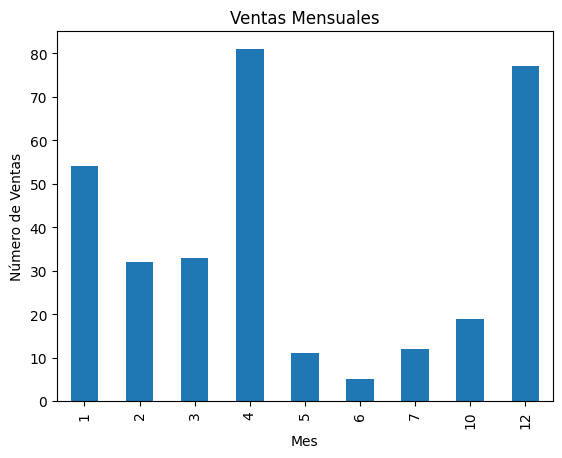

In [ ]:
df['Mes'] = df['Fecha de entrega'].dt.month
ventas_por_mes = df['Mes'].value_counts().sort_index()
ventas_por_mes.plot(kind='bar')
plt.title('Ventas Mensuales')
plt.xlabel('Mes')
plt.ylabel('Número de Ventas')

Como se aprecia, tenemos mas ventas en el mes de Abril, Diciembre y Enero

### ¿Qué red social genera más ventas?
Analiza cuál es tu canal más fuerte: TikTok, Insta, Facebook o ventas directas. Esto te ayuda a decidir dónde meterle más contenido o anuncios.

In [ ]:
df_Red_social=df['Red social de venta'].value_counts()
df_Red_social

,count
Red social de venta,
Facebook,251
Instagram,69
Whatsapp,4


Aunque aqui presente una gran cantidad de ventas en Facebook, de la misma manera es dificil porque no se puede meter publicidad, un extra aqui deberia ser la publicidad en **Tik tok** que ha ayudado a tener mas relevancia con las ventas.

#Sudaderas y Playeras

Empezaremos con un analisis mas detallado de todo esto, primero contaremos que productos son los que se venden mas, playeras o sudaderas

In [ ]:
df.columns

Index(['Diseños pedidos', 'Modelo de celular', 'Modelo numero', 'Talla',
       'Tamaño', 'Diseño completos', 'Anticipo', 'Pagos', 'Tipo de Fundas',
       'Color', 'Cliente', 'Producto ', 'Lugar', 'Fecha de entrega',
       'Red social de venta', 'Precio', 'Lugares de Envio', 'Mes'],
      dtype='object')

  Cuantas sudaderas se vendieron


In [ ]:
df_conteo_sudaderas=df[df['Producto ']=='Sudadera'].shape[0]
df_conteo_playeras=df[df['Producto ']=='Playera'].shape[0]
print('Sudaderas',df_conteo_sudaderas)
print('Playeras',df_conteo_playeras)

Sudaderas 29
Playeras 14


Se puede observar que el producto mas vendido en personalizacion de prendas es las sudaderas

In [ ]:
df_conteo_sudaderas_talla = df[df['Producto '] == 'Sudadera'].groupby('Talla')['Talla'].count()
df_conteo_playeras_talla=df[df['Producto ']=='Playera'].groupby('Talla')['Talla'].count()

print('talla por sudadera',df_conteo_sudaderas_talla)
print('talla por playera',df_conteo_playeras_talla)

talla por sudadera Talla
Chica            6
Extra Grande     6
Grande          14
Mediana          3
Name: Talla, dtype: int64
talla por playera Talla
Chica      1
Grande     6
Mediana    7
Name: Talla, dtype: int64


Mes donde se vendio mas prendas

Text(0, 0.5, 'Número de Ventas')

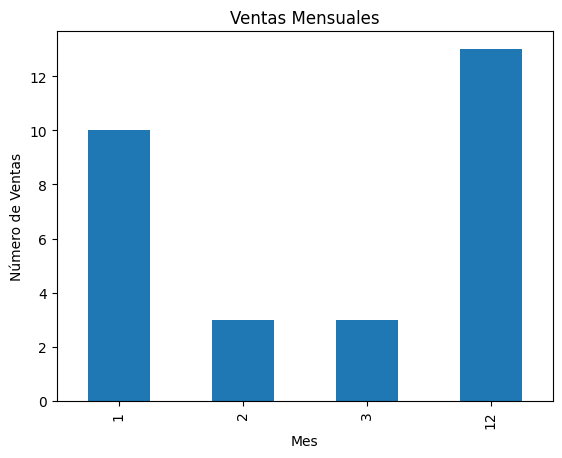

In [ ]:
df['Mes'] = df['Fecha de entrega'].dt.month
ventas_por_mes = df[df['Producto '] == 'Sudadera']['Mes'].value_counts().sort_index()
ventas_por_mes.plot(kind='bar')
plt.title('Ventas Mensuales')
plt.xlabel('Mes')
plt.ylabel('Número de Ventas')
plt.xlabel('Mes')
plt.ylabel('Número de Ventas')

Se vendieron mas prendas en diciembre y enero

#Cuadros Personalizados

Analizaremos cual tamaño de cuadro se vendieron más

In [ ]:
#Agrupando los tamaños de cuadros con el producto
df_cuadros=df[df['Producto ']=='Cuadro'].shape[0]
print('se vendieron:',df_cuadros,'cuadros')
df_cuadros_tamaño=df[df['Producto ']=='Cuadro'].groupby('Tamaño')['Tamaño'].value_counts()
print('tamaño de cuadros vendidos',df_cuadros_tamaño)

se vendieron: 38 cuadros
tamaño de cuadros vendidos Tamaño
CARTA          34
DOBLE CARTA     2
MEDIA CARTA     2
Name: count, dtype: int64


El tamaño de cuadro mas vendido es el Carta quiza por lo visual y que se puede apreciar mejor el diseño

Observaremos las ventas al mes

Text(0, 0.5, 'Número de Ventas')

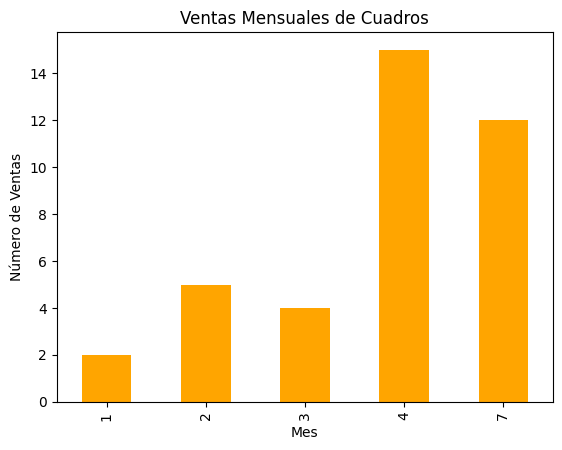

In [ ]:
df['Mes'] = df['Fecha de entrega'].dt.month
ventas_por_mes = df[df['Producto '] == 'Cuadro']['Mes'].value_counts().sort_index()
ventas_por_mes.plot(kind='bar',color='Orange')
plt.title('Ventas Mensuales de Cuadros')
plt.xlabel('Mes')
plt.ylabel('Número de Ventas')
plt.xlabel('Mes')
plt.ylabel('Número de Ventas')

#Ventas totales

In [ ]:
#tomaremos la columna de precios ya que es la mas completa por valortes
Ventas_totales=df['Precio'].value_counts().sum()
print('Ventas totales:',Ventas_totales)

Ventas totales: 324


In [ ]:
#Ingresos de un año registrados
Ingresos_totales=df['Precio'].sum()
print('Ingresos totales:$',Ingresos_totales)

Ingresos totales:$ 91310


In [ ]:
#Promedio de ventas y de productos en total
Promedio_de_ventas=Ventas_totales/len(df)
print('Promedio de ventas:',Promedio_de_ventas)

Promedio de ventas: 1.0


In [ ]:
#Producto mayor vendido
producto_top = df['Producto '].value_counts().idxmax()
print('Producto más vendido', producto_top)

Producto más vendido Funda


#Visualización de estos Datos

Text(0, 0.5, 'Número de Ventas')

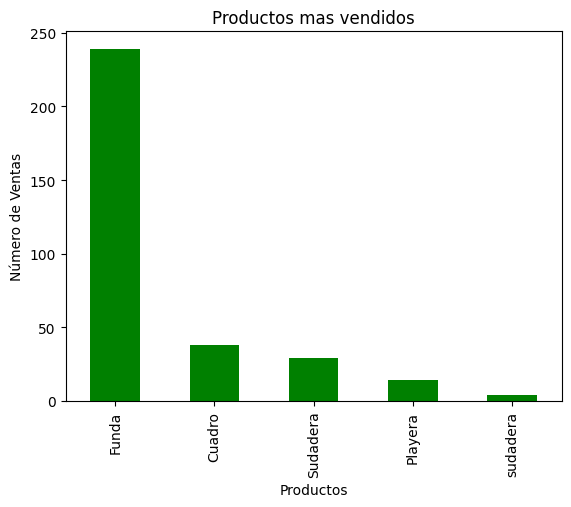

In [ ]:
#Grafica de los productos mas vendidos
producto_mas_vendidos=df['Producto '].value_counts()
producto_mas_vendidos.plot(kind='bar',color='Green')
plt.title('Productos mas vendidos')
plt.xlabel('Productos')
plt.ylabel('Número de Ventas')

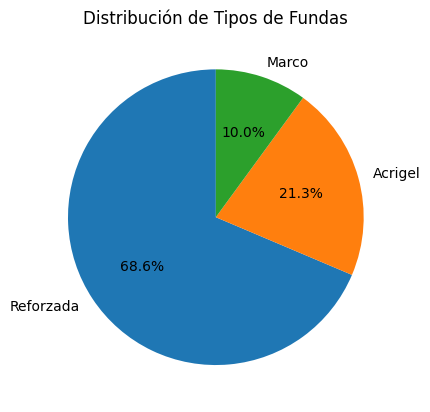

In [ ]:
#Grafico Circular para visualizar todo el tipo de funda mas solcitada
df_conteo_material_total.plotpie = df_conteo_material_total.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Tipos de Fundas')
plt.ylabel('')
plt.show()

Text(0, 0.5, 'Número de Ventas')

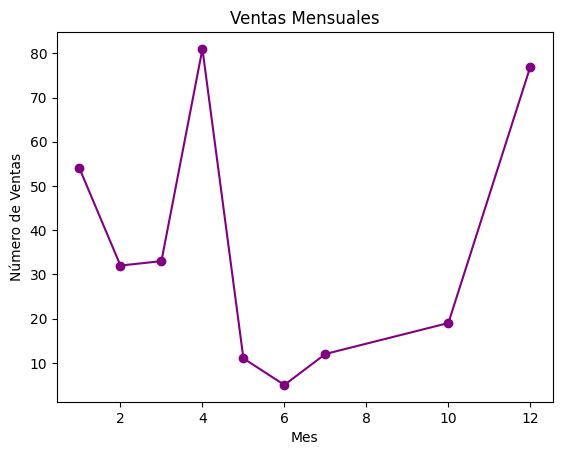

In [ ]:
#Grafico de lineas por mes
df['Mes'] = df['Fecha de entrega'].dt.month
ventas_por_mes = df['Mes'].value_counts().sort_index()
ventas_por_mes.plot(kind='line', marker='o', color='purple')
plt.title('Ventas Mensuales')
plt.xlabel('Mes')
plt.ylabel('Número de Ventas')

#Cuestionamientos importantes

###¿Qué productos ya no vale la pena fabricar?

In [ ]:
#Ordenaremos las ventas
df_conteo_productos=df['Producto '].value_counts()
df_conteo_productos
#ordenaremos en orden
df_conteo_productos_ordenados=df_conteo_productos.sort_values(inplace=False)
df_conteo_productos_ordenados

,count
Producto,
sudadera,4
Playera,14
Sudadera,29
Cuadro,38
Funda,239


Por lo visto el producto que menos se relaiza son las playeras, quizas en este producto o area, deberia realizarse mejor sudaderas que es lo que mas vende y no queda tan lejos de los otros productos

### ¿Cuál es mi red social más efectiva?

In [ ]:
#Hacemos conteo de las ventas respecto a las redfes sociales o un simple conteo
df_red_social_efectiva=df['Red social de venta'].value_counts()
#Ordenamos
df_red_social_efectiva_ordenado=df_red_social_efectiva.sort_values()
df_red_social_efectiva_ordenado

,count
Red social de venta,
Whatsapp,4
Instagram,69
Facebook,251


###¿Qué modelo de celular NO he atacado y podría probar? (Blue Ocean)

In [ ]:
#Agrupemos los modelos de celualr
df_modelos_celular_agrupados=df['Modelo de celular'].value_counts()
df_modelos_celular_agrupados_ordenados=df_modelos_celular_agrupados.sort_values()
df_modelos_celular_agrupados_ordenados

,count
Modelo de celular,
vivo,1
Redmi,2
Honor,2
Oppo,5
Xiaomi,5
zte,10
Motorola,19
Samsung,83
Iphone,112


Los modelos de celular menos vendidos son los vivo, Honor, Xiaomi, este año, anteriores años eran los mas vendidos, quiza la probabilidad de llegar de alguna forma a estos clientes con publicidad relacionados con estos productos

###¿Hay temporadas altas o bajas?

In [ ]:
df['Fecha de entrega'] = pd.to_datetime(df['Fecha de entrega'])
df['Mes'] = df['Fecha de entrega'].dt.month
df['Año'] = df['Fecha de entrega'].dt.year

ventas_mensuales = df.groupby(['Año', 'Mes'])['Precio'].sum()
print(ventas_mensuales)

Año   Mes
2024  1       7930
      2       4590
      3       6360
      4      18920
      5       3190
      6       1450
      7       3000
      10      4940
      12     23330
2025  1       7370
      2       4060
      3       2740
      4       3430
Name: Precio, dtype: int64


Las temporadas altas es Abril, Enero y Diciembre

#Envios y especificadamente los estados a donde se enviaron

In [ ]:
#Analizaremos primero la columna
df_ordenado=df.sort_values(by='Lugares de Envio')
df_ordenado['Lugares de Envio']

,Lugares de Envio
193,Estado de México
317,Estado de México
255,Estado de México
249,Estado de México
201,Estado de México
...,...
303,NaN
304,NaN
305,NaN
306,NaN


Lo organizaremos por grupos

In [ ]:
#valorar los valors
df_estados=df['Lugares de Envio'].value_counts()
df_estados


,count
Lugares de Envio,
Guadalajara,34
Yucatán,8
Estado de México,7
Tijuana,7
Monterrey,6
Querétaro,6
Veracruz,6
San Luis Potosí,5


In [ ]:
#Vamos a agrupar de los productos vendidos en ciertos lugares
df_conteo_agrupado=df['Lugares de Envio'].groupby(df['Producto ']).value_counts()
df_conteo_agrupado

Producto   Lugares de Envio
Cuadro     Guadalajara          7
           Veracruz             2
           Estado de México     1
           Querétaro            1
           Yucatán              1
Funda      Guadalajara         27
           Tijuana              7
           Yucatán              7
           Estado de México     6
           Monterrey            6
           Querétaro            5
           San Luis Potosí      5
           Veracruz             4
Name: count, dtype: int64

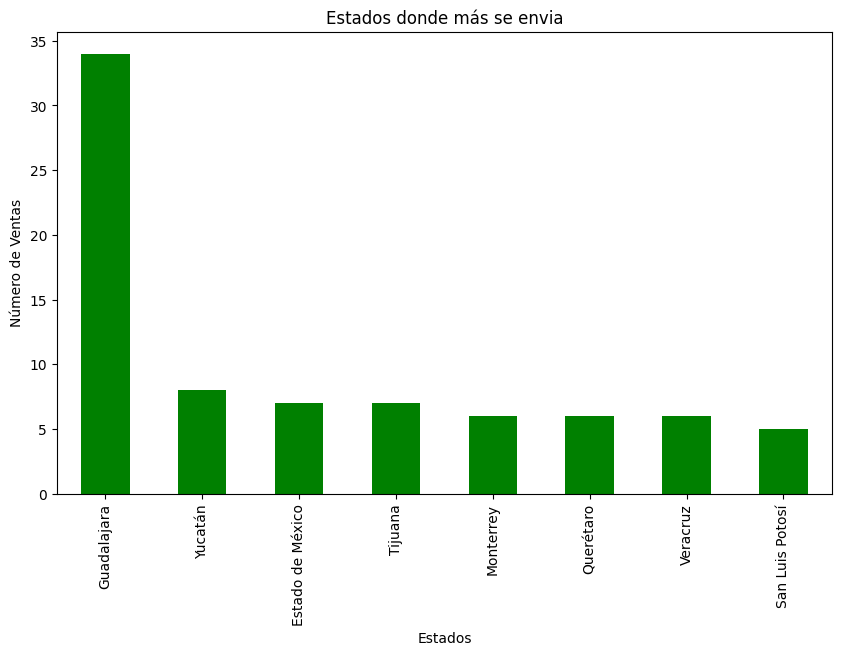

In [ ]:
#Un grafico de barras de los estados donde mas se envia
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df_estados.plot(kind='bar',color='Green')
plt.title('Estados donde más se envia')
plt.xlabel('Estados')
plt.ylabel('Número de Ventas')
plt.show()

Esta observación nos puede indicar una razón en especifica, si se puede se observar los estados, un dato importante de esto, es que en algun tiempo del año pasado justo por abril se tenia un tipo sucursal en Guadalajara por lo que se enviaba las fundas